### 1. Data Loading

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_data():
    url = r"https://raw.githubusercontent.com/sijiao-liu/customer-car-prediction/refs/heads/main/data/car_sales.csv"
    return pd.read_csv(url)

In [12]:
car = load_data()
car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville



### 2. Data Exploring

#### 2.1 Datasets information and types

In [13]:
# Display the structure of the dataset to identify potential preprocessing steps
car.info()
car.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


(23906, 16)

#### 2.2 Data Cleaning

In [42]:
# Data Cleaning

# Check for missing values
missing_values = car.isnull().sum()

# Check for duplicate rows
duplicates_count = car.duplicated().sum()

# Convert Date column to datetime format
car['Date'] = pd.to_datetime(car['Date'], errors='coerce')

# Standardize Gender formatting (e.g., "Male/Female")
car['Gender'] = car['Gender'].str.capitalize()

# Summary of cleaned data
cleaning_summary = {
    "Missing Values": missing_values.sum(),
    "Duplicate Rows": duplicates_count,
    "Date Conversion Issues": car['Date'].isnull().sum()
}

cleaning_summary


{'Missing Values': 1, 'Duplicate Rows': 0, 'Date Conversion Issues': 0}

In [43]:
# Display the number of missing values in each column
missing_values

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

The dataset contains only one missing values under Customer Name, which won't affect our analysis as Customer Name isn't necessary for us.

#### 2.3 Initial Insights
To derive meaningful insights from the data, we can conduct an initial exploratory analysis focusing on the following areas:
1. Demographic Insights
    - Gender Distribution: Understand the gender split among car buyers.
    - Income Patterns: Analyze the distribution of annual income and its impact on car purchasing decisions.

2. Sales Performance
    - Regional Trends: Identify which regions (Dealer_Region) have the highest sales and evaluate any patterns.
    - Top Manufacturers and Models: Determine the most popular car manufacturers and models.
    - Car Categories: Analyze the proportion of different body styles (SUV, Passenger, Hatchback) in the sales.

3. Pricing Analysis
    - Price Distribution: Evaluate the overall price range and identify high-value sales.
    - Price vs. Body Style: Understand which car categories are associated with higher or lower prices.
    - Price vs. Features: Investigate the relationship between price and factors like company, engine type, and transmission.

4. Temporal Insights
    - Seasonality: Examine the sales trend over time to identify potential seasonal effects.
    - Monthly Sales: Evaluate monthly performance to pinpoint peak periods.

##### Let’s start with the demographic distribution and sales performance. I'll perform an analysis and provide visualizations for key trends.

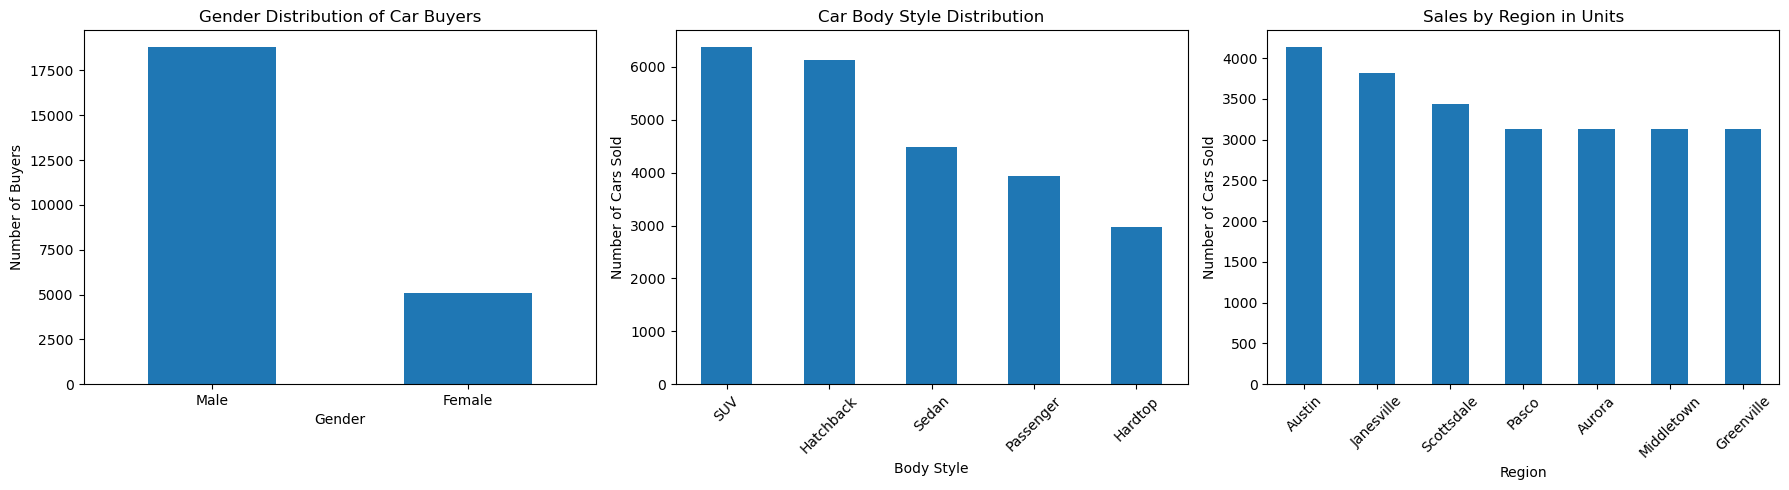

count    23906.000000
mean     28090.247846
std      14788.687608
min       1200.000000
25%      18001.000000
50%      23000.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64

In [41]:
# Plot all three graphs in one row using subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender Distribution
gender_counts.plot(kind='bar', ax=axes[0], title="Gender Distribution of Car Buyers")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of Buyers")
axes[0].set_xticks(range(len(gender_counts.index)), labels=gender_counts.index, rotation=0)

# Car Body Style Distribution
body_style_counts.plot(kind='bar', ax=axes[1], title="Car Body Style Distribution")
axes[1].set_xlabel("Body Style")
axes[1].set_ylabel("Number of Cars Sold")
axes[1].set_xticks(range(len(body_style_counts.index)), labels=body_style_counts.index, rotation=45)

# Regional Sales Distribution
region_counts.plot(kind='bar', ax=axes[2], title="Sales by Region in Units")
axes[2].set_xlabel("Region")
axes[2].set_ylabel("Number of Cars Sold")
axes[2].set_xticks(range(len(region_counts.index)), labels=region_counts.index, rotation=45)

# Adjust layout for better display
plt.tight_layout()
plt.show()

# Display price statistics
price_stats

##### Key Insights from Initial Analysis

1. Gender Distribution:
    - The bar chart shows the number of car buyers split by gender, which can help identify whether there is a dominant demographic among the customers.

2. Car Body Style Distribution:
    - The second chart indicates the proportion of different car categories (SUV, Passenger, Hatchback, etc.) sold. SUVs seem to be among the dominant categories, but specific details depend on the chart.

3. Regional Sales Distribution:
    - The third chart highlights sales by region, revealing which regions have the highest and lowest demand for cars.

4. Price Insights:
The price statistics provide a summary:
    - Mean Price: $28,090
    - Minimum Price: $1,200
    - Maximum Price: $85,800
    - The interquartile range (25%-75%) shows most cars are sold between $18,001 and $34,000.

##### Let’s start with the pricing analysis and temporal insights. I'll perform an analysis and provide visualizations for key trends.

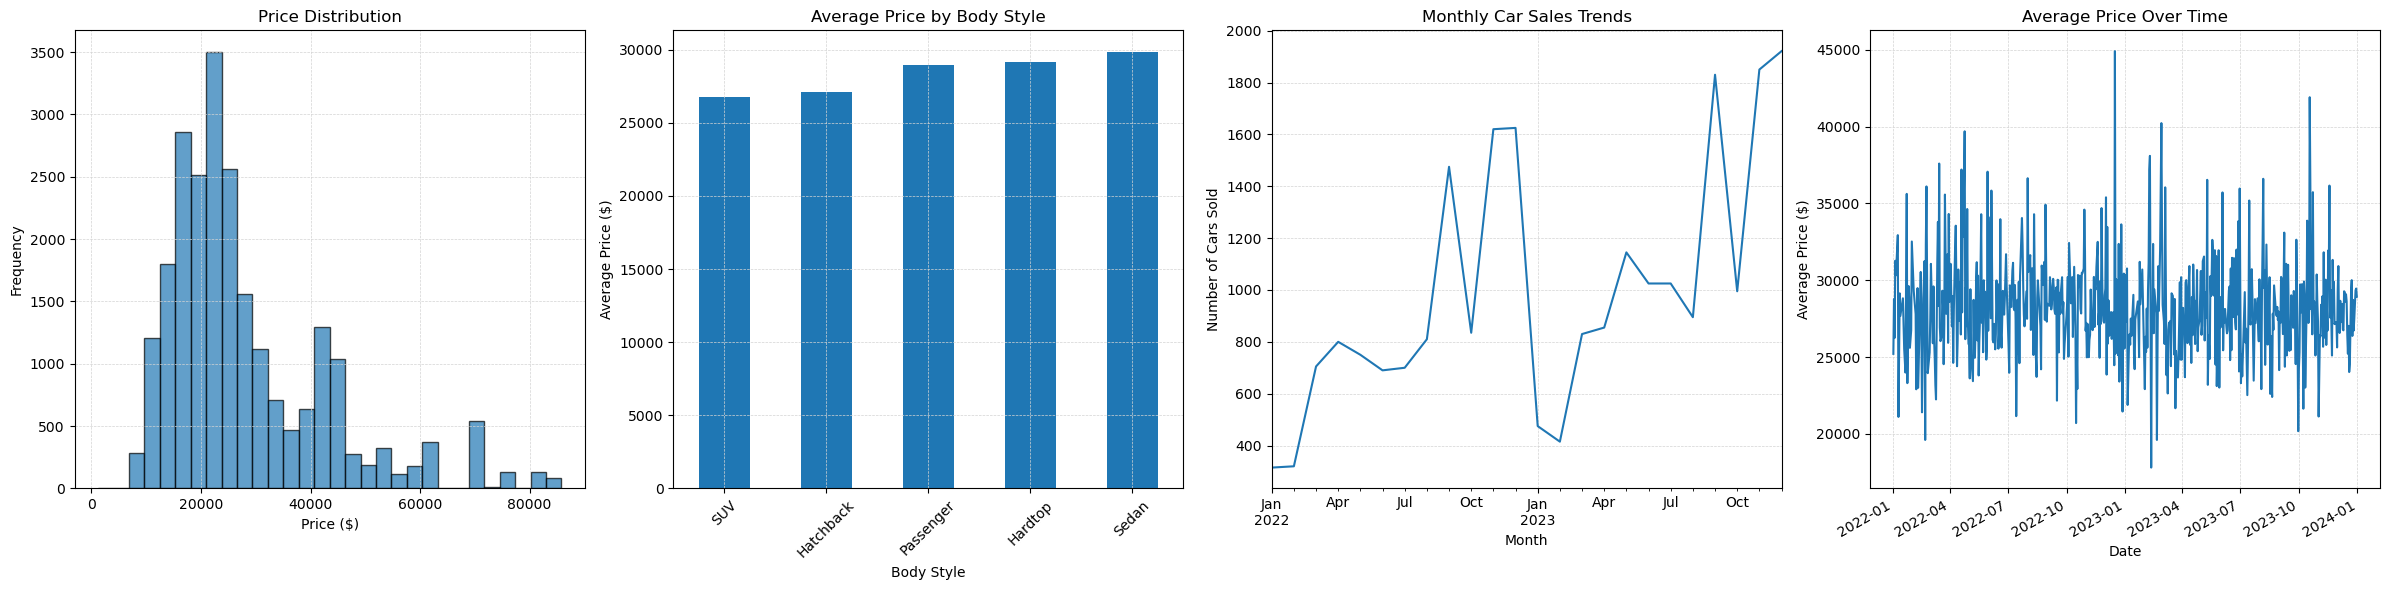

In [50]:
# Plot all four graphs in a single row with lighter gridlines
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Pricing Analysis

# Price Distribution
axes[0].hist(car['Price ($)'], bins=30, alpha=0.7, edgecolor='black')
axes[0].set_title("Price Distribution")
axes[0].set_xlabel("Price ($)")
axes[0].set_ylabel("Frequency")
axes[0].grid(color='lightgrey', linestyle='--', linewidth=0.5)

# Average Price by Body Style
avg_price_by_body_style = car.groupby('Body Style')['Price ($)'].mean().sort_values()

avg_price_by_body_style.plot(kind='bar', ax=axes[1], title="Average Price by Body Style")
axes[1].set_xlabel("Body Style")
axes[1].set_ylabel("Average Price ($)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(color='lightgrey', linestyle='--', linewidth=0.5)


# Temporal Insights

# Monthly Car Sales Trends
car['Month'] = car['Date'].dt.to_period('M')
monthly_sales_trends = car.groupby('Month')['Car_id'].count()

monthly_sales_trends.plot(ax=axes[2], title="Monthly Car Sales Trends")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Number of Cars Sold")
axes[2].grid(color='lightgrey', linestyle='--', linewidth=0.5)

# Average Price Over Time
avg_price_over_time = car.groupby('Date')['Price ($)'].mean()

avg_price_over_time.plot(ax=axes[3], title="Average Price Over Time")
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Average Price ($)")
axes[3].grid(color='lightgrey', linestyle='--', linewidth=0.5)

# Adjust layout for better display
plt.tight_layout()
plt.show()


##### Key Insights from Initial Analysis
**Pricing Analysis**
1. Price Distribution:
    - The histogram shows the distribution of car prices. Most cars fall within a specific range, with fewer cars at the extremes.
2. Average Price by Body Style:
    - The bar chart highlights which car categories (e.g., SUVs, Hatchbacks) have the highest and lowest average prices. This insight can help target customers based on budget and preferences.

**Temporal Insights**
1. Monthly Car Sales Trends:
    - The line chart reveals fluctuations in monthly car sales. Peaks or troughs may indicate seasonality or external market factors (e.g., promotions or economic changes).
2. Average Price Over Time:
    - This line chart shows how the average price of cars has varied over time, which could point to shifts in market demand, inflation, or manufacturer pricing strategies.

##### Plotting sales trends and exploring relationships between key variables? 

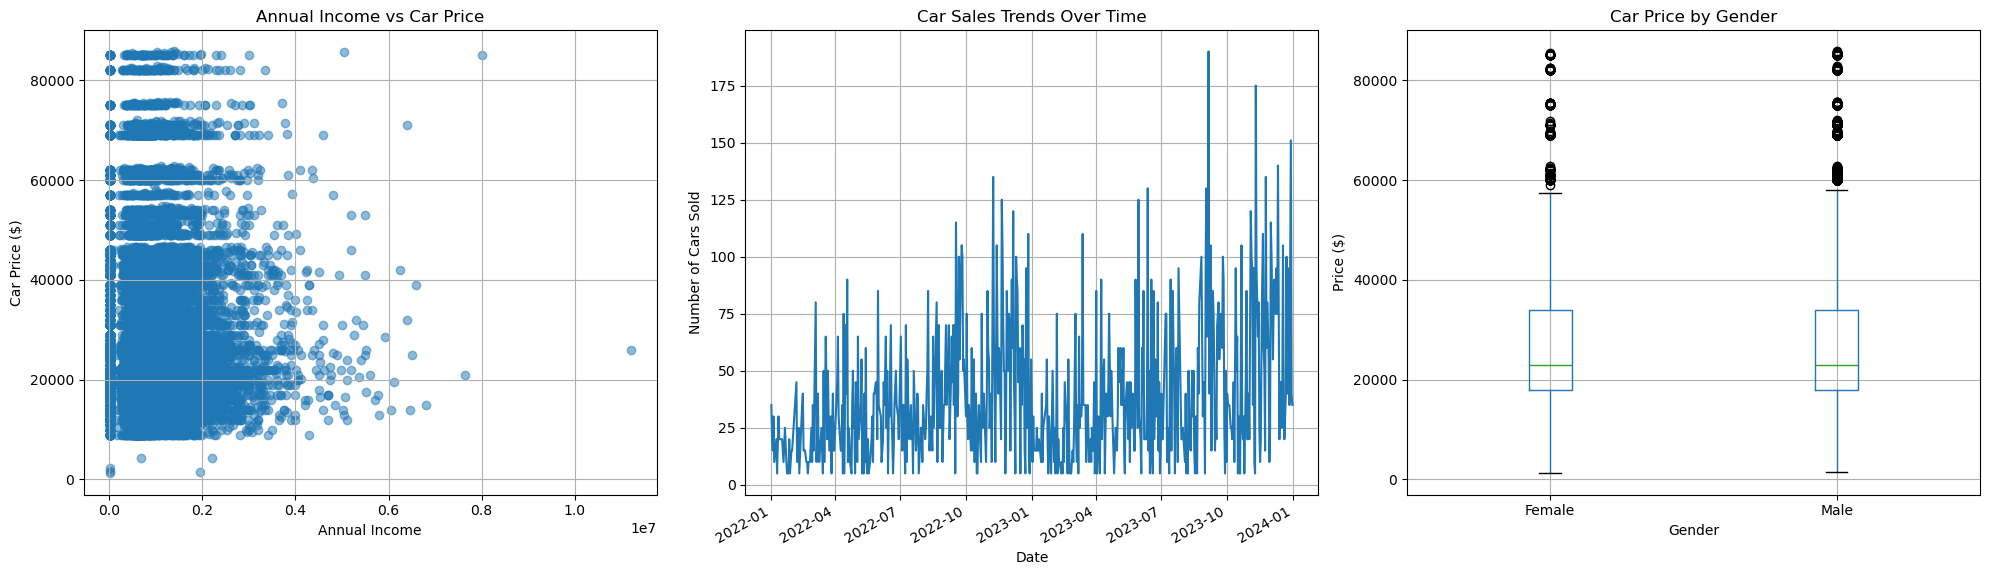

In [46]:
# Visualization of Sales Trends and Key Relationships

# Group sales by date to see trends over time
sales_trends = car.groupby('Date')['Car_id'].count()

# Plot all three graphs in a single row using subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Annual Income vs Car Price (Scatter Plot)
axes[0].scatter(car['Annual Income'], car['Price ($)'], alpha=0.5)
axes[0].set_title("Annual Income vs Car Price")
axes[0].set_xlabel("Annual Income")
axes[0].set_ylabel("Car Price ($)")
axes[0].grid(True)

# Car Sales Trends Over Time
sales_trends.plot(ax=axes[1], title="Car Sales Trends Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Number of Cars Sold")
axes[1].grid(True)

# Boxplot of Price by Gender
car.boxplot(column='Price ($)', by='Gender', ax=axes[2])
axes[2].set_title("Car Price by Gender")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Price ($)")
axes[2].grid(True)
fig.suptitle("")  # Remove the automatic overall title

# Adjust layout for better display
plt.tight_layout()
plt.show()


##### Visualizations and Insights

1. Annual Income vs Car Price (Scatter Plot):
    - There doesn't appear to be a strong relationship between annual income and car price, as indicated by a low correlation (r=0.012).

2. Car Sales Trends Over Time:
    - Sales exhibit fluctuations, possibly indicative of seasonal patterns or market trends.

3. Car Price by Gender (Box Plot):
    - The box plot shows differences in price distribution between genders, but further statistical tests would be needed to confirm significance.


### 3. Data Processing


In [15]:
# Load necessary libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#### 3.1 Drop Irrelevant Columns
Columns like Car_id, Customer Name, Dealer_Name, Dealer_No, and Phone are irrelevant for prediction.

In [23]:
# Identify the irrelevant columns
columns_to_drop = ['Car_id', 'Customer Name', 'Dealer_Name', 'Dealer_No', 'Phone']

# Drop the irrelevant columns only once
car_cleaned = car.drop(columns=columns_to_drop, errors='ignore')  # `errors='ignore'` skips columns that don't exist

car_cleaned.head()

,Date,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,Janesville


#### 3.2 Convert Date
Extract the year and month from the Date column for potential trend analysis.

In [24]:
# Convert 'Date' to datetime and extract year and month
car_cleaned['Date'] = pd.to_datetime(car_cleaned['Date'])
car_cleaned['Year'] = car_cleaned['Date'].dt.year
car_cleaned['Month'] = car_cleaned['Date'].dt.month
car_cleaned = car_cleaned.drop(columns=['Date'], errors='ignore')

car_cleaned.head()

,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region,Year,Month
0,Male,13500,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown,2022,1
1,Male,1480000,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora,2022,1
2,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,Greenville,2022,1
3,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,Pasco,2022,1
4,Male,1465000,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,Janesville,2022,1


#### 3.3 Encode Categorical Variables
- Gender, Body Style, Transmission, Color, and Dealer_Region need encoding.
- Use one-hot encoding or label encoding as required.


In [26]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Body Style', 'Transmission', 'Color', 'Dealer_Region']
for column in categorical_columns:
    le = LabelEncoder()
    car_cleaned[column] = le.fit_transform(car_cleaned[column])
    label_encoders[column] = le

#### 3.4 Scale Numerical Columns
Scale Annual Income and Price ($) for consistent feature magnitudes.

In [27]:
# Scale numerical features
scaler = MinMaxScaler()
numerical_columns = ['Annual Income', 'Price ($)']
car_cleaned[numerical_columns] = scaler.fit_transform(car_cleaned[numerical_columns])


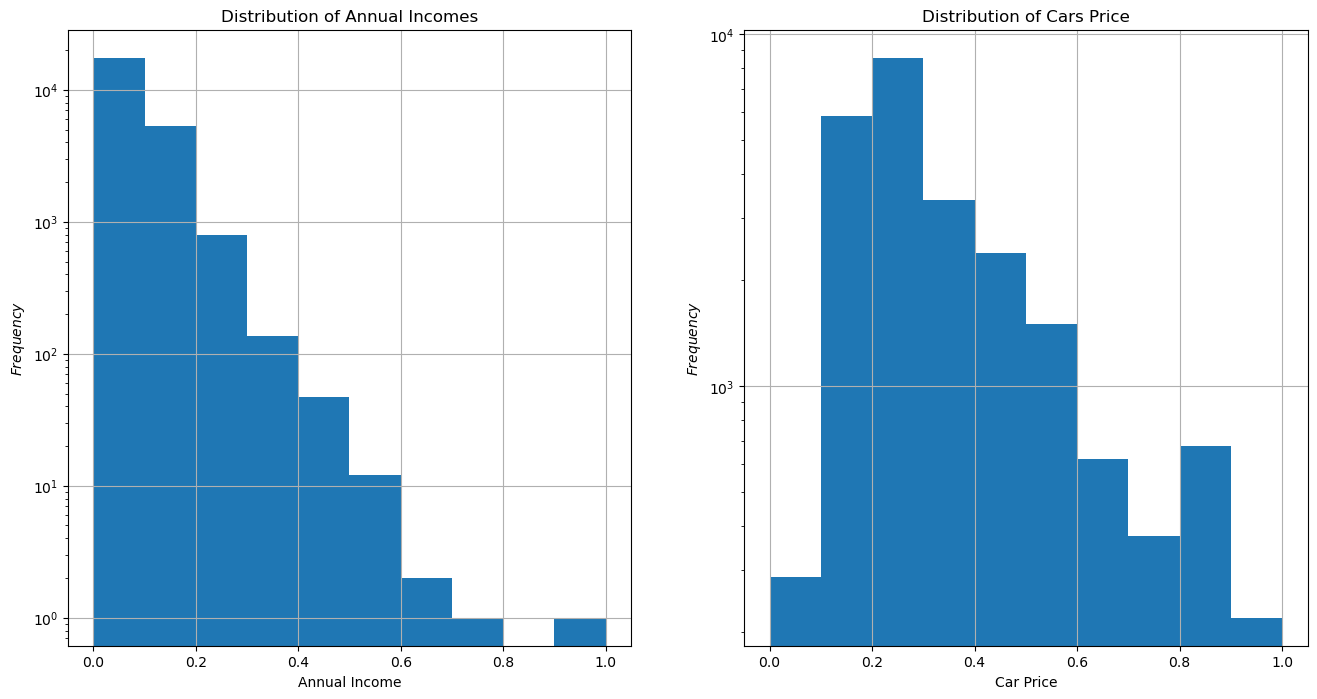

In [35]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
car_cleaned["Annual Income"].hist(log=True)
plt.title("Distribution of Annual Incomes")  
plt.xlabel("Annual Income")  
plt.ylabel("$Frequency$")  

plt.subplot(1, 2, 2)
car_cleaned["Price ($)"].hist(log=True)
plt.title("Distribution of Cars Price")  
plt.xlabel("Car Price")  
plt.ylabel("$Frequency$")  

plt.show()

In [36]:
car_cleaned.to_csv("../data/preprocessed_car_sales_data.csv", index=False)



### Dataset is clean!

# Next Steps:

Convert categorical variables to numerical

Feature scaling

Correlations